In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

In [ ]:
train_ds_raw = tf.keras.utils.image_dataset_from_directory(
    "dataset/train",
    image_size=(224, 224),
    batch_size=32
)

val_ds_raw = tf.keras.utils.image_dataset_from_directory(
    "dataset/validation",
    image_size=(224, 224),
    batch_size=32
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
import os
from PIL import Image

folders = ["dataset/train", "dataset/validation"]

for folder in folders:
    print(f"\nCek folder: {folder}")
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                img_path = os.path.join(root, file)
                try:
                    img = Image.open(img_path)
                    if img.mode != "RGB":
                        print(f"{img_path} --> mode: {img.mode}")
                except Exception as e:
                    print(f"Error buka {img_path}: {e}")



Cek folder: dataset/train

Cek folder: dataset/validation


In [ ]:
class_names = train_ds_raw.class_names
print("Classes:", class_names)

Classes: ['cats', 'dogs']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds_raw.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds_raw.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  

In [ ]:
inputs = layers.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1058s 2s/step - accuracy: 0.9104 - loss: 0.2252 - val_accuracy: 0.9796 - val_loss: 0.0746
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 452s 723ms/step - accuracy: 0.9667 - loss: 0.0949 - val_accuracy: 0.9842 - val_loss: 0.0547
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 361s 577ms/step - accuracy: 0.9694 - loss: 0.0807 - val_accuracy: 0.9850 - val_loss: 0.0488
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 362s 579ms/step - accuracy: 0.9726 - loss: 0.0729 - val_accuracy: 0.9858 - val_loss: 0.0447
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 364s 583ms/step - accuracy: 0.9744 - loss: 0.0688 - val_accuracy: 0.9858 - val_loss: 0.0446
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 357s 571ms/step - accuracy: 0.9763 - loss: 0.0664 - val_accuracy: 0.9866 - val_loss: 0.0413
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 356s 569ms/step - accuracy: 0.9758 - loss: 0.0668 - val_accuracy: 0.9866 - val_loss: 0.0412
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 357s 572ms/step - accuracy: 0.9755 - l

In [ ]:
base_model.trainable = True
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_ft = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1535s 2s/step - accuracy: 0.9435 - loss: 0.1403 - val_accuracy: 0.9882 - val_loss: 0.0365
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1462s 2s/step - accuracy: 0.9704 - loss: 0.0760 - val_accuracy: 0.9900 - val_loss: 0.0327
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1461s 2s/step - accuracy: 0.9755 - loss: 0.0617 - val_accuracy: 0.9892 - val_loss: 0.0351
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1460s 2s/step - accuracy: 0.9809 - loss: 0.0520 - val_accuracy: 0.9876 - val_loss: 0.0375
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1452s 2s/step - accuracy: 0.9847 - loss: 0.0426 - val_accuracy: 0.9862 - val_loss: 0.0408


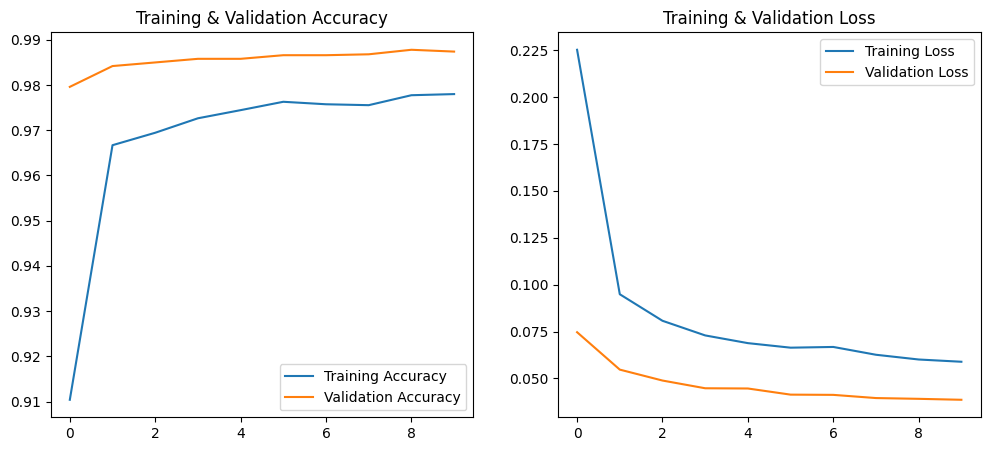

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training & Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training & Validation Loss")

plt.show()

In [ ]:
val_loss, val_acc = model.evaluate(val_ds)
print(f"\n✅ Validation Accuracy: {val_acc*100:.2f}%")

157/157 ━━━━━━━━━━━━━━━━━━━━ 62s 395ms/step - accuracy: 0.9862 - loss: 0.0408

✅ Validation Accuracy: 98.62%


In [ ]:
def predict_image(img_path, model, class_names):
    img = image.load_img(img_path, target_size=(224, 224))  
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])  

    print(
        f"Gambar ini diprediksi sebagai '{class_names[np.argmax(score)]}' "
        f"dengan confidence {100*np.max(score):.2f}%"
    )

predict_image("cat.jpg", model, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Gambar ini diprediksi sebagai 'cats' dengan confidence 73.08%


In [17]:
model.save('Image_classify.keras')

In [22]:
train_ds_raw.class_names

['cats', 'dogs']